In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import matplotlib.ticker as mtick

In [88]:
churn_df = pd.read_csv('customer_churn.csv')
print(churn_df.columns)
churn_df['Churn Rate'] = churn_df['Churn Rate'].apply(lambda x: float(x.strip('%')))
churn_df['Churn Rate - 12'] = churn_df['Churn Rate - 12'].apply(lambda x: None if pd.isna(x) else float(x.strip('%')))
churn_df['MRR Churn Rate'] = churn_df['MRR Churn Rate'].apply(lambda x: float(x.strip('%')))
churn_df['Month'] = pd.to_datetime(churn_df['Month'])
churn_df = churn_df.sort_values('Month')
display(churn_df)


Index(['Month', 'Customer Start Period', 'Customers End Period', 'Churn Rate',
       'Churn Rate - 12', 'New Customers', 'MRR', 'MRR Churn Rate', 'MRR Left',
       'MRR New'],
      dtype='object')


,Month,Customer Start Period,Customers End Period,Churn Rate,Churn Rate - 12,New Customers,MRR,MRR Churn Rate,MRR Left,MRR New
0,2019-07-01,5000,4477,10.5,NaN,780,650000.0000,5.90,611650.0000,NaN
1,2019-08-01,5257,4705,10.5,NaN,650,611650.0000,6.30,573116.0500,NaN
2,2019-09-01,5355,4787,10.6,NaN,680,573116.0500,6.50,535863.5068,NaN
3,2019-10-01,5467,4822,11.8,NaN,750,535863.5068,6.60,500496.5153,NaN
4,2019-11-01,5572,4792,14.0,NaN,800,500496.5153,7.00,465461.7592,60000.0
5,2019-12-01,5592,4697,16.0,NaN,830,525461.7592,8.00,483424.8185,74000.0
6,2020-01-01,5527,4847,12.3,NaN,840,557424.8185,6.20,522864.4797,53000.0
7,2020-02-01,5687,5135,9.7,NaN,850,575864.4797,6.25,539872.9498,53000.0
8,2020-03-01,5985,5398,9.8,NaN,840,592872.9498,6.30,555521.9539,53000.0
9,2020-04-01,6238,5664,9.2,NaN,820,608521.9539,6.50,568968.0269,53000.0


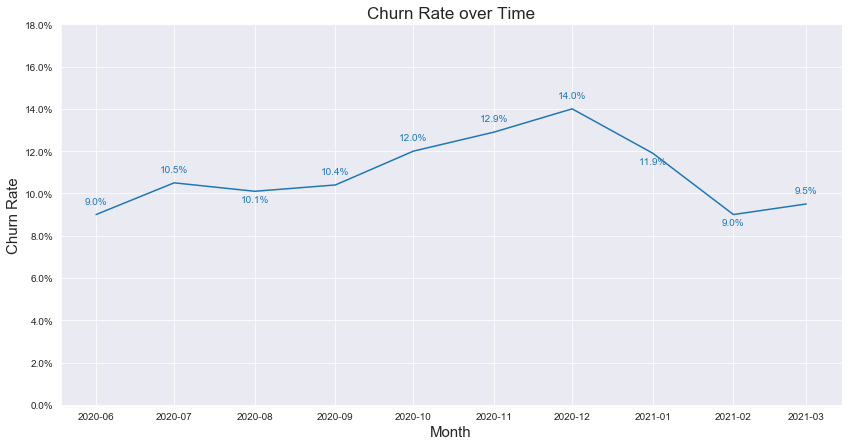

In [121]:
sns.set_style("darkgrid")

a4_dims = (14, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)

churn_short = churn_df.tail(10)

ax = sns.lineplot(x='Month', y='Churn Rate', data=churn_short, ax=ax)
ax.set(ylim=[0.0,18])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('Churn Rate over Time',fontsize=17)
ax.set_ylabel('Churn Rate',fontsize=15)
ax.set_xlabel('Month',fontsize=15)

x = 0
for index, row in churn_short.iterrows():
    if x > row['Churn Rate']:
        ax.text(row['Month'], row['Churn Rate'] - 0.5, str(row['Churn Rate']) + '%', color='C0', ha="center")
    else:
       ax.text(row['Month'], row['Churn Rate'] + 0.5, str(row['Churn Rate']) + '%', color='C0', ha="center")
    x = row['Churn Rate']

# ax.set_xticklabels(ax.get_xticklabels(), rotation=40)

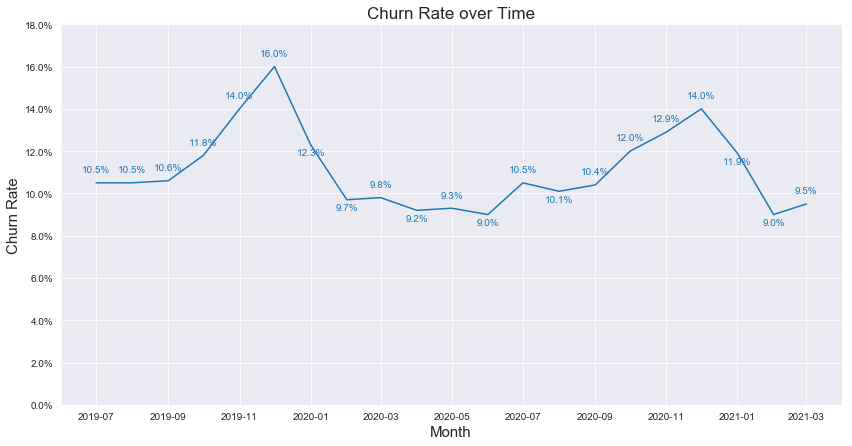

In [77]:
sns.set_style("darkgrid")

a4_dims = (14, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)

ax = sns.lineplot(x='Month', y='Churn Rate', data=churn_df, ax=ax)
ax.set(ylim=[0.0,18])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('Churn Rate over Time',fontsize=17)
ax.set_ylabel('Churn Rate',fontsize=15)
ax.set_xlabel('Month',fontsize=15)

x = 0
for index, row in churn_df.iterrows():
    if x > row['Churn Rate']:
        ax.text(row['Month'], row['Churn Rate'] - 0.5, str(row['Churn Rate']) + '%', color='C0', ha="center")
    else:
       ax.text(row['Month'], row['Churn Rate'] + 0.5, str(row['Churn Rate']) + '%', color='C0', ha="center")
    x = row['Churn Rate']

# ax.set_xticklabels(ax.get_xticklabels(), rotation=40)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

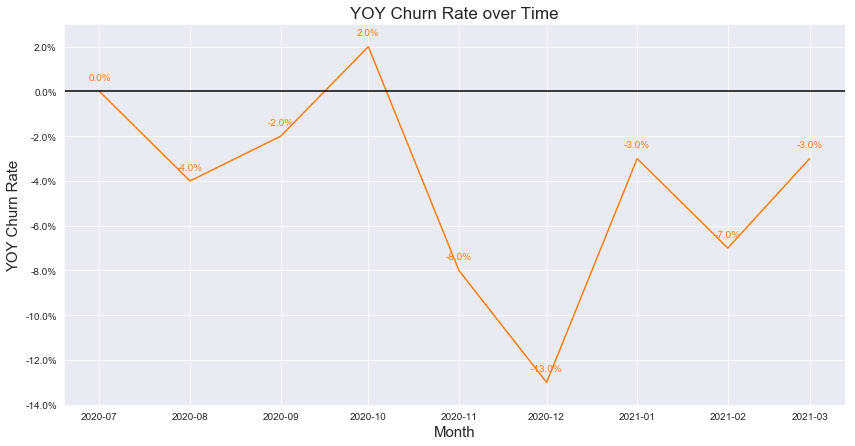

In [101]:
sns.set_style("darkgrid")

a4_dims = (14, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)

ax = sns.lineplot(x='Month', y='Churn Rate - 12', data=churn_df, color='C1', ax=ax)
ax.set(ylim=[-14.0,3])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('YOY Churn Rate over Time',fontsize=17)
ax.set_ylabel('YOY Churn Rate',fontsize=15)
ax.set_xlabel('Month',fontsize=15)
ax.axhline(0.0, color='black')

x = 0
for index, row in churn_df.iterrows():
    if x > row['Churn Rate']:
        ax.text(row['Month'], row['Churn Rate - 12'] - 0.5, str(row['Churn Rate - 12']) + '%', color='C1', ha="center")
    else:
       ax.text(row['Month'], row['Churn Rate - 12'] + 0.5, str(row['Churn Rate - 12']) + '%', color='C1', ha="center")
    x = row['Churn Rate - 12']

# ax.set_xticklabels(ax.get_xticklabels(), rotation=40)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


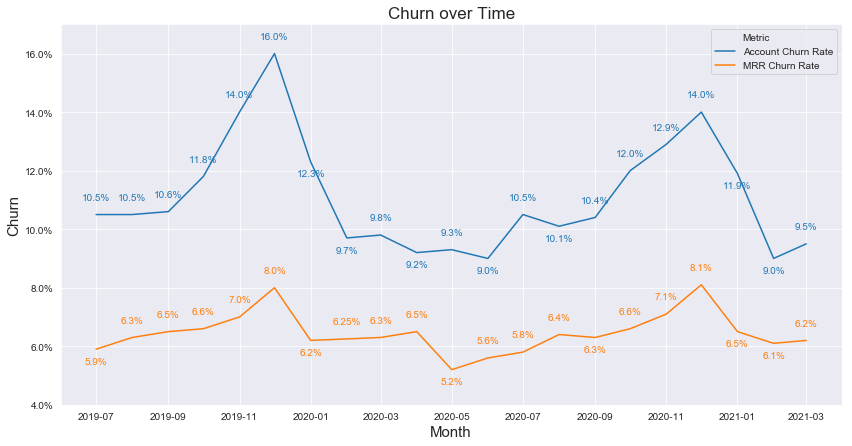

In [119]:
data_df = churn_df[['Month', 'Churn Rate']]
data_df['Metric'] = 'Account Churn Rate'

data_df2 = churn_df[['Month', 'MRR Churn Rate']]
data_df2['Metric'] = 'MRR Churn Rate'
data_df2 = data_df2.rename(columns={'MRR Churn Rate':'Churn Rate'})

data_df = pd.concat([data_df, data_df2]).reset_index()

a4_dims = (14, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax=sns.lineplot(x='Month', y='Churn Rate', hue='Metric', data=data_df)

ax.set(ylim=[4,17])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('Churn over Time',fontsize=17)
ax.set_ylabel('Churn',fontsize=15)
ax.set_xlabel('Month',fontsize=15)

x = 0
for index, row in data_df.iterrows():
    if row['Metric'] == 'MRR Churn Rate':
        c = 'C1'
    else:
        c = 'C0'
    if x > row['Churn Rate']:
        ax.text(row['Month'], row['Churn Rate'] - 0.5, str(row['Churn Rate']) + '%', color=c, ha="center")
    else:
       ax.text(row['Month'], row['Churn Rate'] + 0.5, str(row['Churn Rate']) + '%', color=c, ha="center")
    x = row['Churn Rate']
